# Page Rank :

Source : https://learning.ecam.be/SA4T/slides/06-pagerank/1/1

*PageRank* is Google's original algorithm for ranking web pages by importance. 

It models web browsing as a random walk through pages connected by hyperlinks, where a page's importance is proportional to how often a random surfer would visit it.


### Core Concepts

<img src="img/mi.png" width="80%">

We shall make the following assumptions:
- Each page has the same probability of being the start page

- There is at most one link from one page to another

- On each page, each link has the same probability of being clicked.

- If there are no links, the next page can be any page with equal probability.


### Probability Vector:

A probability vector **p** represents the distribution of a random surfer across all pages at a given time:

**p** = [p₁, p₂, ..., pₙ]ᵀ

Where:
- pᵢ = probability the surfer is on page i
- Σ pᵢ = 1 (all probabilities must sum to 1)
- pᵢ ≥ 0 for all i (non-negative)

**Example:** For 4 pages: p = [0.25, 0.25, 0.25, 0.25] means 25% chance of being on each page.

<img src="img/vp.png" width="70%">

Steady-state: After many clicks, p converges to the PageRank vector — the long-term probability distribution representing each page's importance.

### Stochastic Matrix :

A **stochastic matrix** T encodes the link structure between pages. It's called "stochastic" because each column sums to 1 (like a probability distribution).

ex. _"I'm on page 3, what's the probability of me ending up on page 1 ?"_

-> T_13 = 1 (on image below, page 3 only links to page 1, I can ONLY go to page 1)

<img src="img/sm.png" width="70%">

<!-- M_ij = p -->

**Interpretation:**
- T[i][j] = probability of jumping from `page j` to `page i`.
- Sum of each column = 1.0 (stochastic)

#### Property - Convergence : 
<img src="img/sm1.png" width="70%">

**Rank of a Page:**

<img src="img/property.png" width="25%">

- noted p(k+1), or `r`.
- initially, we don't know what the probability, so we assume all pages have an equal probability.
- the goal here is to iterate this matrix mutliplication until it converges to a stable value of `r`.
- this is our final Page Ranking.

Source : [M4ML - Linear Algebra - 5.7 Introduction to PageRank](https://www.youtube.com/watch?v=urKLHNhUEQ0)


#### Property - Stopping Criterion : 


We know we have attained convergence when :

$$
\vec{p}^{(k)} = T \vec{p}^{(k)}
$$
We define our Error Vector (how much the vector has changed) :
$$
T \vec{p}^{(k)} - \vec{p}^{(k)} = 0.
$$


A good stopping criterion is thus

$$
\frac{\lVert T \vec{p}^{(k)} - \vec{p}^{(k)} \rVert_1}
{\lVert \vec{p}^{(k)} \rVert_1}
\le \varepsilon
$$

Meaning : _"Stop when the relative error (difference between the next iteration and the previous one) is under ϵ."_

where
- The numerator is our Error Vector.
- The denominator is the norm of our current guess (=1)
- Taking the L1 norm is done becuse (??)

**L1 Norm:**

The L1 norm adds up the absolute values of all entries. 

For example :
$$
\lVert \vec{v} \rVert_1 = \sum_{i=1}^{n} |v_i|.
$$

The norm collapses a vector into a single meaningful number that represents its overall magnitude. 



**Choosing epsilon and k :**
The division is made to obtain the relative error (%) and not the absolute error.
- epsilon ϵ : tolerance, usually 10^(-8) or 10^(-12)
- iterations k : we don't choose k directly. You choose ϵ and iterate until the criterion is met. This is much better than guessing a large k, because for some networks, convergence might be fast (needs small k). For others, it might be slow (needs large k). The criterion adapts.


<!-- $$\lVert \vec{p}^{(k)} \rVert_1$$ : -->










.



---
## Assignment :


**Goal**
Implement a simplified version of Google's original PageRank algorithm on a Wikipedia snapshot dataset to:
1. Calculate PageRank scores for all pages
2. Rank pages by importance
3. Implement a basic search function


Extra credit: implement PageRank with a damping factor. You need to find out what it
is yourself, and understand why a damping factor is necessary.

### Projects Requirements :


Given a Wikipedia dataset, create a pageRank and some search functionnalities.


1. Read the graph from the CSV files.

2. Construct the transition matrix `T`. (The dataset is huge, have a look at sparse matrices.)

3. Calculate `p()` for `k` sufficiently large via the iteration `(k+1) = Tp(k)`

4. Deduce an approximation of the PageRank vector : `p(∞) ≈ p(k)` for k sufficiently large.







Notes :
- dataset is so large it would not fit into ram, but it contains a large numbers of 0's (probability of someone going from the teacher's website to fox news is 0). Use sparse matrixes





Bonus : 
- Implement damping



---
## 1. Page Ranking System :

Helpfull Notes : 
- We expect the first ranked page to be 'USA'.
- check out numpy.bincount

### Small starting example:

Consider a 4-page website, each page has links to one another : 

**Graph Structure:**

<img src="img/pgr_ex.png" width="70%">

- Page 0 links to: Pages 1, 2, 3 (3 outgoing links)
- Page 1 links to: Pages 2, 3 (2 outgoing links)
- Page 2 links to: Page 0 (1 outgoing link)
- Page 3 links to: Pages 0, 2 (2 outgoing links)


We look at the columns to see the probabilities of a page : 

Column 0:
T[:,0] = [0, 1/3, 1/3, 1/3]  
- P[Page 0 to Page 0] = 0
- P[Page 0 to Page 1] = 1/3
- P[Page 0 to Page 2] = 1/3
- P[Page 0 to Page 3] = 1/3

Column 1:
- ...





In [1]:
import numpy as np
# from numpy import matrix

T = np.array([
    [0,   0,   1, 1/2],    # Page0 : 0_0=0, 0_1=1/3, 0_2=1/3, 0_3=1/3
    [1/3, 0,   0, 0],
    [1/3, 1/2, 0, 1/2],
    [1/3, 1/2, 0, 0],
])

# Initial probability (at time 0, all pages equally likely to be visited)
p = np.array([[1/4], [1/4], [1/4], [1/4]])



for i in range(100):
    p = T@p

for i in range(3):
    print(f"Page Rank of Page {i} ≈ {p[i][0]*100:.1f} %")
# print(f"p(∞) ≈ {p}")

Page Rank of Page 0 ≈ 38.7 %
Page Rank of Page 1 ≈ 12.9 %
Page Rank of Page 2 ≈ 29.0 %


#### Visualizing the Convergence :


Converged after 38 iterations!
Final PageRank scores:
Page 0: 0.387097 (38.71%)
Page 1: 0.129032 (12.90%)
Page 2: 0.290323 (29.03%)
Page 3: 0.193548 (19.35%)


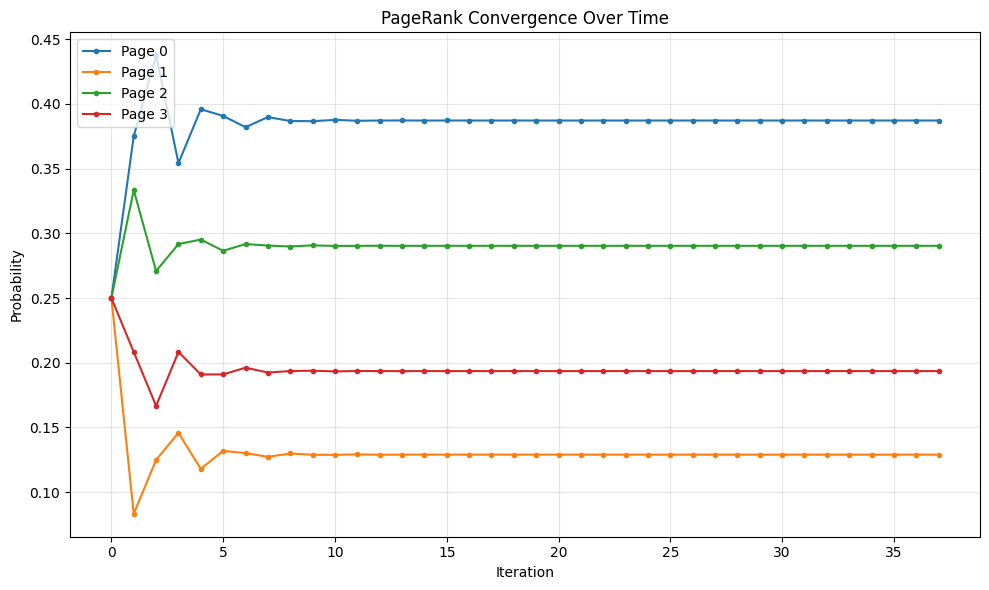

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transition matrix
T = np.array([
    [0, 0, 1, 1/2],
    [1/3, 0, 0, 0],
    [1/3, 1/2, 0, 1/2],
    [1/3, 1/2, 0, 0],
])

# Initial uniform distribution
p = np.array([[1/4], [1/4], [1/4], [1/4]])

# Track convergence
history = [p.copy()]
max_iter = 100

# Simulate PageRank iterations
for i in range(max_iter):
    p_new = T @ p
    change = np.linalg.norm(p_new - p, 1)  # L1 norm
    # Early stopping
    if change < 1e-10:
        print(f"\nConverged after {i+1} iterations!")
        break
    
    p = p_new
    history.append(p.copy())


print("Final PageRank scores:")
for i in range(4):
    print(f"Page {i}: {p[i,0]:.6f} ({p[i,0]*100:.2f}%)")

# ============= Plot convergence =============
history_array = np.array(history).squeeze()
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(history_array[:, i], label=f'Page {i}', marker='o', markersize=3)
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title('PageRank Convergence Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Wikipedia Page Rank

In [3]:
edges_src = 'data/wikidata/edges.csv'
names_src = 'data/wikidata/names.csv'

#### **1 - Load and Parse the Graph**

Read `edges.csv` and `names.csv`:
- `edges.csv`: source_page_id, target_page_id
- `names.csv`: page_id, page_name
- Result: Build a mapping: page_id → list of outgoing links

In [4]:
# Info on our edges files :

import pandas as pd

# Load 
edges_total = len(pd.read_csv(edges_src)) 
names_total = len(pd.read_csv(names_src))

print(f"Total edges: {edges_total:,}") # 10,722,190
print(f"Total pages: {names_total:,}") # 199,903
print(f"Average links per page: {edges_total/names_total:.2f}") #53.64

Total edges: 10,722,190
Total pages: 199,903
Average links per page: 53.64


Csv Structure : 
- edges.csv: FromNode → ToNode (source links to target)
- names.csv: just page names (index is the page ID)


In [5]:
# Briefly show what the files look like :
#
# EDGES Structure :
#   entry 0 : there is a link (edge) from Node 175973 to Node 1.
#   ...
#
# Names structure :
#   Page 0 : named "Morphological parsing"
#   ...
# ------------------------------------------
edges_df = pd.read_csv(edges_src, nrows=5)
names_df = pd.read_csv(names_src, nrows=5)

print("EDGES structure:")
print(edges_df)
print("\nNAMES structure:")
print(names_df)

EDGES structure:
   FromNode  ToNode
0    175973       1
1    130880       2
2    145856       2
3    159190       2
4    159200       2

NAMES structure:
                                                Name
0                              Morphological parsing
1                              Site-specific theatre
2  Cyclopaedia, or an Universal Dictionary of Art...
3                                   Ephraim Chambers
4                           Chambers's Encyclopaedia


#### **2 - Build Sparse Transition Matrix**

Use `scipy.sparse` (CSC format for efficient column operations):
- Dimension: N×N where N = number of pages
- T[i][j] = 1/out_degree[j] if j→i, else 0


Note :
- Dead-end pages : some pages points to no one, which means they have 0 probabilities.
- We could make it self-reference, but that might create problems.
- so we Distribute dead-end pages as linking to all pages uniformly


In [6]:
# Build our Stochastic Matrix T :
#
#   1. Read the Edge list (which page points to which page).
# 
#   2. Count how many links each page has in a list : 
#       -> [page 1 points to 7 other pages, page 2...]
#          Count how many links each page has (np.bincount)
# 
#   3. Dead-ends :
#       = pages not pointing to any other page (column of zeroes)
#         but our columns must all sum-up to 1 ! (Stochastic)
#         Solution : artificially say, dead-ends points to all other pages equally. 
# 
# 
#   4. Transition Matrix :
#       Gives the probabilities of going to any other page starting from a given page.
# 
# 
# 
# 
# 

# ex. Bincount(input, weights, minLenght)  https://numpy.org/doc/2.3/reference/generated/numpy.bincount.html
    # -> given an array of numbers, how many times does each number occur ?
    # -> returns a list of occurences where each index is the number we consider, and its value the number of times it occured in the list.
    # raw_data = np.array([0, 1, 1, 3, 2, 1, 7])
    # minLength = 10                              # padd the output with 0s to be at least this long             
    # print(f"Occurences : {np.bincount(raw_data)}")
    # print(f"Padded     : {np.bincount(raw_data, minlength=minLength)}")


# ---------------------------------------
from scipy.sparse import csc_matrix
import numpy as np

# 1. Load all edges
edges = pd.read_csv(edges_src)
n_pages = names_total + 1      # 10M pages

# 2. Count link occurences
out_degree = np.bincount(edges['FromNode'], minlength=n_pages)  # count how many times each number appears in an array

# 3. Distribute dead-end pages as linking to all pages uniformly
dead_ends = (out_degree == 0)    # build a True/False matrix showing pages with 0 links
dead_end_indices = np.where(dead_ends)[0]
num_dead_ends = len(dead_end_indices)
# out_degree[dead_ends] = n_pages  # say this page has ALL the pages linking to it
print(f"Found {dead_ends.sum():,} dead-end pages")
print(f"index of dead-end pages: {num_dead_ends:,}")

# 4. Build sparse matrix data T[i][j]
    # col : list of pages FROM which we are coming (source pages)
        # ex. col0 means 'from page 0', here are the prob of going to (page 1 .... page N) read vertically.
    # Row : list of pages TO which we are going FROM the same indexed column page (target pages)
        # ex. row0 means 'to page 0', here are the prob of coming FROM (page 1 ... page N) read horizontally.
    # ----> EX. T[0][1] = prob of going TO page 0 FROM page 1
    # data : set probability T[ToNode, FromNode]
    #
    #     EDGES structure:
    #    FromNode  ToNode
    # 0    175973       1
    # 1    130880       2
    # 2    145856       2
    # 3    159190       2
    # 4    159200       2
    #  
    #  
    # ex. 
    #   source = [0, 0, 0, 1, 1, 2, 3, 3]     -> 0 pointe vers 1,2 et 3
    #   target = [1, 2, 3, 2, 3, 0, 0, 2]
    #   out_degree = [3, 2, 1, 2] : Page 0 pointe vers 3 pages, P1 vers 2, P2 vers 1,...
    #   out_degree[col] = [3, 3, 3, 2, 2, 1, 2, 2] : 
    #   data = [1/3, 1/3, 1/3, 1/2, 1/2, 1, 1/2, 1/2]
    #
    #


source = edges['FromNode'].values  # Extract the 'FromNode' into an array. (source pages)
target = edges['ToNode'].values    # Extract the 'ToNode'. (target pages)

source_out_degree = out_degree[source] 
data = 1.0 / source_out_degree    # 1/nmb of occurences in other pages

# Create sparse matrix (CSC format for fast matrix-vector multiply)
n, m = n_pages, n_pages
T = csc_matrix((data, (target, source)), shape=(n, m))

# DEAD ends : 
column_sums = T.sum(axis=0).A1
dead_end_cols = np.where(column_sums==0)[0]
print(f"Found {len(dead_end_cols):,} dead-end columns")

if len(dead_end_cols) > 0:
    # Convert to LIL format for efficient column modification
    T_lil = T.tolil()

    # For each dead-end column, set to 1/n_pages everywhere
    for col in dead_end_cols:
        T_lil[:, col] = 1.0 / n_pages

    # Convert back to CSC format for efficient matrix-vector multiplication
    T = T_lil.tocsc()

    assert np.allclose(T.sum(axis=0).A1, 1.0)





# 2. Self-looping 
    # dead_ends = (out_degree == 0)
    # out_degree[dead_ends] = 1 
    # print(f"Found {dead_ends.sum():,} dead-end pages")
    # # Build matrix
    # row = edges['ToNode'].values
    # col = edges['FromNode'].values
    # data = 1.0 / out_degree[col]

    # # Add self-loops for dead-ends explicitly
    # dead_idx = np.nonzero(dead_ends)[0]
    # row = np.concatenate([row, dead_idx])
    # col = np.concatenate([col, dead_idx])
    # data = np.concatenate([data, np.ones_like(dead_idx, dtype=float)])
    # T = csc_matrix((data, (row, col)), shape=(n_pages, n_pages))


print(f"Matrix sample:")
print(T[:5, :5].toarray())
print("==========")
print(f"Matrix shape: {T.shape}")
print(f"Non-zero entries: {T.nnz:,}")
# print(f"Sparsity: {100 * (1 - T.nnz / (n_pages**2)):.4f}%")




Found 1 dead-end pages
index of dead-end pages: 1
Found 1 dead-end columns
Matrix sample:
[[5.00240115e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [5.00240115e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [5.00240115e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [5.00240115e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.69230769e-02]
 [5.00240115e-06 0.00000000e+00 0.00000000e+00 4.16666667e-02
  0.00000000e+00]]
Matrix shape: (199904, 199904)
Non-zero entries: 10,922,094


#### **3 - Convergence**

Now that we got our transition Matrix, we need to use it to multiply our probability vector and see where it converges.


In [7]:
# Convergence :
#
#   Goal : do p_new=T*p_old as much times as necessary for (p_old - p_new) < ϵ
#
#
# Probability vector
num_pages = n_pages
p = np.ones(num_pages) / num_pages   # Init: each page has 1/num_pages chance of being visited
print(f"num_pages : {num_pages}")
print(f"p ~ [1/{num_pages}, 1/{num_pages}, ...]")
print(f"Total p_i sum: {p.sum()}")

max_iter = 1000 # safeguard
tol = 1e-10    # stopping criterion's epsilon tolerance

for i in range(max_iter + 1):
    p_new = T @ p
    change = np.linalg.norm(p_new - p, 1)  # L1 norm

    # Stopping Criterion
    if change < tol: print(f"\nConverged after {i+1} iterations!"); break
    
    p = p_new


for i in range(5) :
    print(f"Page {i} has probability : {p[i]:.6f}")

print(f"\nFinal p sum (should be ~1): {p.sum()}\n")
print(f"Min score: {p.min():.1f},\n Max score: {p.max():.10f}")  #0.0024907533


scores = p


num_pages : 199904
p ~ [1/199904, 1/199904, ...]
Total p_i sum: 1.0

Converged after 150 iterations!
Page 0 has probability : 0.000000
Page 1 has probability : 0.000002
Page 2 has probability : 0.000001
Page 3 has probability : 0.000011
Page 4 has probability : 0.000004

Final p sum (should be ~1): 0.9999999999999992

Min score: 0.0,
 Max score: 0.0024907657


#### **4 - Rank Pages by importance**

Sort pages by p[i] in descending order. Top 100 pages are the "most important."


In [8]:

# 1. Get indices sorted by score (descending

# Load page names
names_df = pd.read_csv(names_src)
page_names = names_df['Name'].values


def top100(p):
    top_indices = np.argsort(p)[::-1][:100] # Ascending + -1 to rev into Descending

    for rank, idx in enumerate(top_indices, 1):
        if idx < len(page_names):
            name = page_names[idx - 1]
        else:
            name = f"Page {idx}"
        print(f"{rank:3d}. {name[:40]:40s} | Score: {p[idx]:.10f}")


top100(scores)


  1. United States                            | Score: 0.0024907657
  2. United Kingdom                           | Score: 0.0013900215
  3. World War II                             | Score: 0.0011310783
  4. Latin                                    | Score: 0.0010843890
  5. France                                   | Score: 0.0010771055
  6. Germany                                  | Score: 0.0009190593
  7. English language                         | Score: 0.0008390214
  8. China                                    | Score: 0.0007970909
  9. Canada                                   | Score: 0.0007910754
 10. India                                    | Score: 0.0007893491
 11. Mathematics                              | Score: 0.0007648158
 12. Italy                                    | Score: 0.0007303566
 13. Catholic Church                          | Score: 0.0007275721
 14. Australia                                | Score: 0.0006834859
 15. Greek language                           | 

#### **5 - Implement Search**


Given a query string, find pages matching the query and return top-K by PageRank score.


In [9]:
# Search Function :
#
#   1. Compare query string to Page names (all lowercased)
#   2. sort matches in popularity order
#


# Simple search function
def search(query, k=10):
    # Get indices of matching pages
    matches = []
    for i, name in enumerate(page_names):
        if isinstance(name,str):                        # check if page name is not Nan
            if query.lower() in name.lower():
                matches.append((i+1, scores[i+1], name))
    
    # Sort by score (descending)
    matches.sort(key=lambda x: x[1], reverse=True)
    
    # Print top k
    print(f"Top {k} pages for '{query}':")
    for rank, (idx, score, name) in enumerate(matches[:k], 1):
        print(f"{rank:3d}. {name[:50]:50s} | Score: {score:.10f}")
    
    return matches[:k]

# Usage:
# search("computer", k=15)
# search("Main Page", k=15)
search("United", k=15)











Top 15 pages for 'United':
  1. United States                                      | Score: 0.0024907657
  2. United Kingdom                                     | Score: 0.0013900215
  3. United Nations                                     | Score: 0.0003868365
  4. United States dollar                               | Score: 0.0002990310
  5. President of the United States                     | Score: 0.0002955108
  6. United States Congress                             | Score: 0.0002790251
  7. Supreme Court of the United States                 | Score: 0.0002370216
  8. United States Senate                               | Score: 0.0002353880
  9. Democratic Party (United States)                   | Score: 0.0001946518
 10. United States Navy                                 | Score: 0.0001889010
 11. Republican Party (United States)                   | Score: 0.0001866264
 12. United States House of Representatives             | Score: 0.0001811978
 13. United States Constitution      

[(112356, np.float64(0.0024907657149451203), 'United States'),
 (168241, np.float64(0.0013900215057531034), 'United Kingdom'),
 (17872, np.float64(0.00038683651288139246), 'United Nations'),
 (92126, np.float64(0.00029903101123758693), 'United States dollar'),
 (17138, np.float64(0.0002955108353450709), 'President of the United States'),
 (16963, np.float64(0.0002790250558460615), 'United States Congress'),
 (126782,
  np.float64(0.00023702164399158206),
  'Supreme Court of the United States'),
 (16923, np.float64(0.00023538802397989124), 'United States Senate'),
 (20409,
  np.float64(0.00019465180368337533),
  'Democratic Party (United States)'),
 (95860, np.float64(0.0001889009629915586), 'United States Navy'),
 (20410, np.float64(0.000186626433973763), 'Republican Party (United States)'),
 (20531,
  np.float64(0.0001811978210260284),
  'United States House of Representatives'),
 (126685, np.float64(0.00017859323282710455), 'United States Constitution'),
 (121128, np.float64(0.000176

## 2. Damping Factor :

#### **6 (Bonus) - Add Damping Factor**

Source : https://www.youtube.com/watch?v=meonLcN7LD4

<img src="img/property2.png" width="25%">





Damping adds a relative chance for the surfer to teleport to a random page.

- This allows to converge faster (explore all the graph faster and more reliably).
- Prevent the surfer from getting stuck in dead-ends.

#### Damped:

In [10]:
# Damping : 
#
#   - Using the same T matrix, lets iterate on our Probability vector using Damping.
#
#   
#   - Each iteration, there's an "α" probability to follow a link, 
#       and a (1-α) probability to teleport to a random page uniformly.
#
#   - The surfer doesnt get stuck in dead-ends, cycles or diconnected pages.
#
#
#
#


alpha = 0.85
teleport = (1- alpha) / num_pages
tol = 1e-10
max_iter = 1000


p = np.ones(num_pages) / num_pages


for i in range(max_iter + 1):
    p_new = alpha * (T @ p) + teleport
    change = np.linalg.norm(p_new - p, 1)  # L1 norm

    # Stopping Criterion
    if change < tol: print(f"\nConverged after {i+1} iterations!"); break
    
    p = p_new


for i in range(5) :
    print(f"Page {i} has probability : {p[i]:.6f}")

print(f"\nFinal p sum (should be ~1): {p.sum()}\n")
print(f"Min score: {p.min():.1f},\n Max score: {p.max():.10f}")  #0.0024907533


scores_damped = p







Converged after 65 iterations!
Page 0 has probability : 0.000001
Page 1 has probability : 0.000002
Page 2 has probability : 0.000002
Page 3 has probability : 0.000009
Page 4 has probability : 0.000004

Final p sum (should be ~1): 1.0

Min score: 0.0,
 Max score: 0.0023481631


#### Top-100 Ranking:

In [11]:
# TOP-100
top100(scores_damped)

  1. United States                            | Score: 0.0023481631
  2. United Kingdom                           | Score: 0.0012822674
  3. World War II                             | Score: 0.0010508741
  4. France                                   | Score: 0.0009902438
  5. Latin                                    | Score: 0.0008532094
  6. Germany                                  | Score: 0.0008474864
  7. Canada                                   | Score: 0.0007292934
  8. English language                         | Score: 0.0006945830
  9. China                                    | Score: 0.0006935177
 10. India                                    | Score: 0.0006786597
 11. Italy                                    | Score: 0.0006571538
 12. Catholic Church                          | Score: 0.0006247491
 13. Australia                                | Score: 0.0006234200
 14. England                                  | Score: 0.0006210366
 15. World War I                              | 

#### Comparison:

In [12]:
# Main Differences :
#   
#   - Damped guarantees to always converge.
#   - Damped handles dead-ends better (teleports out of them).
#   - Handling dead-ends by distributing them equally allows the user to actually go to another page (i.e. he never "gets stuck")
#
#   - Damped converge more quickly ! Especially in disconnected graphs/poorly connected ones.
#
#   - Without damping (α=1), the surfer always follows links, but may get stuck in dead-ends or sinks.
#
# Bias :
#   - Undamped : bias towards pages in strongly connected areas.
#   - Damped : 
#
#
# Convergence :
#   
#   - Damped converged after 65 iterations, while the undamped after 150 !
#
# 
# Ex. :
#   A points to B, B points to A, C has no links, D points to A.
#   source = [0, 1, 3]
#   target = [1, 0, 1]
#   out_degree = [1, 2, 0, 1]
#   
#   Undamped (α = 1.0):
#       - Sink trap : A and B will get all the probability
#       - C gets 0 (dead-end), D gets 0 (flows to A)
#      -> A=0.5, B=0.5, C=0, D=0
#  
#   Damped (α = 1.0):
#       - A and B get most of Prob
#       - C and D gets some probability (from teleportations ! )
#      -> A=0.4, B=0.4, C=0.05, D=0.15
#  





